
# I ran some clustering in parallel to Abhishek. We ended up using his figures and my 'Top 10 Most Profitable Outliers' output.


I didn't want to be too brutal in the Participation Report, but I was incredibly unimpressed with the lack of effort generally put in by my team mates. 
- Olabode's *miniscule* contributions are not reflected in the report because they were of too poor quality and/or he was simply too lazy to add them to the group document himself. In my opinion, he did everything possible to skirt doing any real work on this assignment and doesn't know enough to present with us. (2/10)
- Rohit did more work on this project than he's done on all of Say My Name. He still didn't contribute much more than copy pasting other people's analysis into the group document, and *minor* editing. The night before submission he went offline at 8PM and never bothered to check the document again, despite my 3AM messages that it needs review in the morning. (4/10)
- Ilan was slightly absentee but had legitimate reasons that he shared with the group. He was self sufficient, did his own modeling, and was consistently checking in with how he can help more. His contributions to the final report lacked, only complaint. (7/10)
- Vijay and Abhishek did their fair share of modeling, their contributions to the final report lacked. (8/10)


In [2]:
import numpy as np
from scipy.spatial.distance import mahalanobis
import pandas as pd

# Read the CSV file
df = pd.read_csv(r"C:\Users\brend\OneDrive\Desktop\AIGS\AIGS1006 - Deep Learning\Sneakers\Test.csv")

# Display the header of the DataFrame
print(df.head())


C:\Users\brend\AppData\Local\Temp\ipykernel_37236\2870348418.py:6: DtypeWarning: Columns (0,1,2,3,4,5,8,9,10,11,12,13,14,15,16,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\brend\OneDrive\Desktop\AIGS\AIGS1006 - Deep Learning\Sneakers\Test.csv")


          SKU                                               NAME  \
0  CZ1055-101  Nike Blazer Mid 77 Vintage Habanero Red (Women's)   
1  302370-145                          Jordan 9 Retro Pearl Blue   
2  DC9845-100                 Nike Air Max 90 White Orange Black   
3  CN8093-006                      Jordan 8 Retro Pinksicle (TD)   
4  CU8591-101  Nike Air Force 1 Low Shadow Sunset Pulse (Wome...   

                SOLD_AT         Day       day+1 Missing Dates  SOLD_PRICE  \
0  2021-05-09T14:40:03Z  2021-05-09  2021-05-10           NaN       124.0   
1  2021-05-09T14:40:10Z  2021-05-09  2021-05-10           NaN       330.0   
2  2021-05-09T14:40:18Z  2021-05-09  2021-05-10           NaN       120.0   
3  2021-05-09T14:40:40Z  2021-05-09  2021-05-10           NaN       100.0   
4  2021-05-09T14:40:49Z  2021-05-09  2021-05-10           NaN       120.0   

   RETAILPRICE RELEASEDATE   COLOR  ...  SIZE   GENDER   BRAND    SILHOUETTE  \
0        100.0  2021-10-30     red  ...   10W   

In [8]:
unique_brands = df['BRAND'].unique()
print(unique_brands)


['Nike' 'Jordan' 'adidas' 'Vans' 'Converse' 'Gucci' 'Alexander McQueen'
 'ASICS' 'Reebok' 'New Balance' 'Puma' 'Dior' 'Balenciaga' 'Yeezy'
 'Under Armour' 'Diadora' 'Crocs' 'Off-White' 'Burberry' 'Common Projects'
 'OFF-WHITE' 'Louis Vuitton' 'Saucony' 'Versace' 'BAPE' 'MSCHF' 'Li-Ning'
 'Salomon' 'Hoka One One' 'Veja' 'On' 'ON' 'Fila' 'Fear of God' 'Prada'
 'Saint Laurent']


C:\Users\brend\AppData\Local\Temp\ipykernel_25500\854963362.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['Cluster'] = np.random.randint(1, 4, size=len(df_subset))


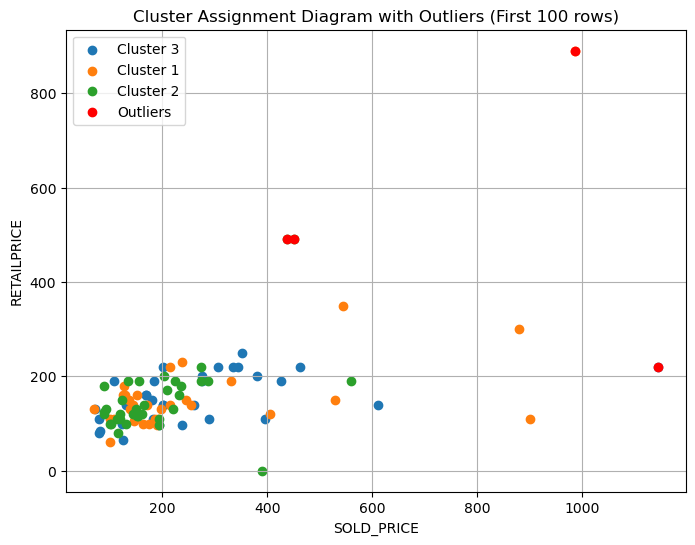

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import mahalanobis
from sklearn.cluster import KMeans

# Assuming 'df' is your dataset in a pandas DataFrame
# Select numerical columns for MD calculation
numerical_cols = ['SOLD_PRICE', 'RETAILPRICE', 'SIZE_VALUE']

# Accessing only the first 100 rows of the DataFrame
df_subset = df.head(100)

# Calculate mean and covariance matrix
mean = np.mean(df_subset[numerical_cols], axis=0)
covariance_matrix = np.cov(df_subset[numerical_cols], rowvar=False)

# Calculate Mahalanobis Distance for each data point
md = []
for idx, row in df_subset[numerical_cols].iterrows():
    md.append(mahalanobis(row, mean, np.linalg.inv(covariance_matrix)))

# Set threshold for outliers (e.g., considering z-score)
threshold = np.mean(md) + 3 * np.std(md)

# Identify outliers
outliers = df_subset[np.array(md) > threshold]

# Assign random clusters initially
df_subset['Cluster'] = np.random.randint(1, 4, size=len(df_subset))

# Visualize clustering with outliers highlighted
plt.figure(figsize=(8, 6))

# Plot data points by cluster
for cluster_num in df_subset['Cluster'].unique():
    cluster_data = df_subset[df_subset['Cluster'] == cluster_num]
    plt.scatter(cluster_data['SOLD_PRICE'], cluster_data['RETAILPRICE'], label=f'Cluster {cluster_num}')

# Highlight outliers in red
plt.scatter(outliers['SOLD_PRICE'], outliers['RETAILPRICE'], color='red', label='Outliers')

plt.xlabel('SOLD_PRICE')
plt.ylabel('RETAILPRICE')
plt.title('Cluster Assignment Diagram with Outliers (First 100 rows)')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\brend\AppData\Local\Temp\ipykernel_25500\539583322.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['Cluster'] = np.random.randint(1, 4, size=len(df_subset))


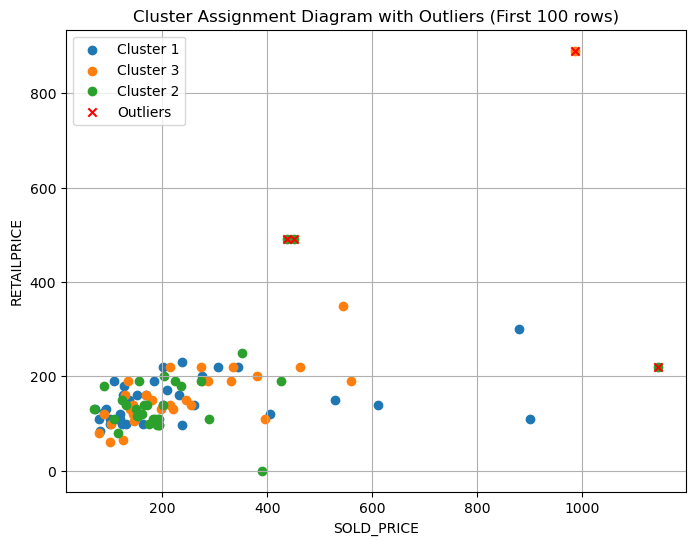

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import mahalanobis
from sklearn.cluster import KMeans

# Assuming 'df' is your dataset in a pandas DataFrame
# Select numerical columns for MD calculation
numerical_cols = ['SOLD_PRICE', 'RETAILPRICE', 'SIZE_VALUE']

# Accessing only the first 100 rows of the DataFrame
#df_subset = df.head(100)

# Calculate mean and covariance matrix
mean = np.mean(df_subset[numerical_cols], axis=0)
covariance_matrix = np.cov(df_subset[numerical_cols], rowvar=False)

# Calculate Mahalanobis Distance for each data point
md = []
for idx, row in df_subset[numerical_cols].iterrows():
    md.append(mahalanobis(row, mean, np.linalg.inv(covariance_matrix)))

# Set threshold for outliers (e.g., considering z-score)
threshold = np.mean(md) + 3 * np.std(md)

# Identify outliers
outliers = df_subset[np.array(md) > threshold]

# Assign random clusters initially
df_subset['Cluster'] = np.random.randint(1, 4, size=len(df_subset))

# Visualize clustering with outliers highlighted
plt.figure(figsize=(8, 6))

# Plot data points by cluster
for cluster_num in df_subset['Cluster'].unique():
    cluster_data = df_subset[df_subset['Cluster'] == cluster_num]
    plt.scatter(cluster_data['SOLD_PRICE'], cluster_data['RETAILPRICE'], label=f'Cluster {cluster_num}')

# Highlight outliers with 'X' markers in red
plt.scatter(outliers['SOLD_PRICE'], outliers['RETAILPRICE'], color='red', marker='x', label='Outliers')

plt.xlabel('SOLD_PRICE')
plt.ylabel('RETAILPRICE')
plt.title('Cluster Assignment Diagram with Outliers (First 100 rows)')
plt.legend()
plt.grid(True)
plt.show()


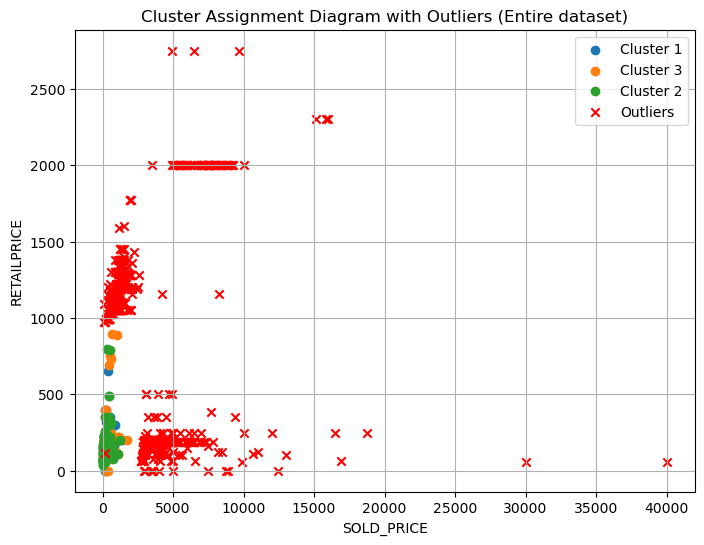

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import mahalanobis
from sklearn.cluster import KMeans

# Select numerical columns for MD calculation
numerical_cols = ['SOLD_PRICE', 'RETAILPRICE', 'SIZE_VALUE']

# Condition to choose between subset and entire dataset
use_subset = False  # Set to True to use a subset, False to use entire dataset

if use_subset:
    # Accessing only the first 100 rows of the DataFrame
    df_subset = df.head(1000)

    # Calculate mean and covariance matrix for the subset
    mean = np.mean(df_subset[numerical_cols], axis=0)
    covariance_matrix = np.cov(df_subset[numerical_cols], rowvar=False)

    # Calculate Mahalanobis Distance for each data point in the subset
    md = []
    for idx, row in df_subset[numerical_cols].iterrows():
        md.append(mahalanobis(row, mean, np.linalg.inv(covariance_matrix)))

    # Set threshold for outliers (e.g., considering z-score) for the subset        # Set threshold here
    threshold = np.mean(md) + 3 * np.std(md)

    # Identify outliers in the subset
    outliers = df_subset[np.array(md) > threshold]

    # Assign random clusters initially for the subset
    df_subset['Cluster'] = np.random.randint(1, 4, size=len(df_subset))

    title = 'Cluster Assignment Diagram with Outliers (First 100 rows)'
else:
    # Calculate mean and covariance matrix for the entire dataset
    mean = np.mean(df[numerical_cols], axis=0)
    covariance_matrix = np.cov(df[numerical_cols], rowvar=False)

    # Calculate Mahalanobis Distance for each data point in the entire dataset
    md = []
    for idx, row in df[numerical_cols].iterrows():
        md.append(mahalanobis(row, mean, np.linalg.inv(covariance_matrix)))

    # Set threshold for outliers (e.g., considering z-score) for the entire dataset
    threshold = np.mean(md) + 8 * np.std(md)

    # Identify outliers in the entire dataset
    outliers = df[np.array(md) > threshold]

    # Assign random clusters initially for the entire dataset
    df['Cluster'] = np.random.randint(1, 4, size=len(df))

    title = 'Cluster Assignment Diagram with Outliers (Entire dataset)'

# Visualize clustering with outliers highlighted
plt.figure(figsize=(8, 6))

# Plot data points by cluster
for cluster_num in df_subset['Cluster'].unique():
    cluster_data = df_subset[df_subset['Cluster'] == cluster_num]
    plt.scatter(cluster_data['SOLD_PRICE'], cluster_data['RETAILPRICE'], label=f'Cluster {cluster_num}')

# Highlight outliers with 'X' markers in red
plt.scatter(outliers['SOLD_PRICE'], outliers['RETAILPRICE'], color='red', marker='x', label='Outliers')

plt.xlabel('SOLD_PRICE')
plt.ylabel('RETAILPRICE')
plt.title(title)
plt.legend()
plt.grid(True)
plt.show()


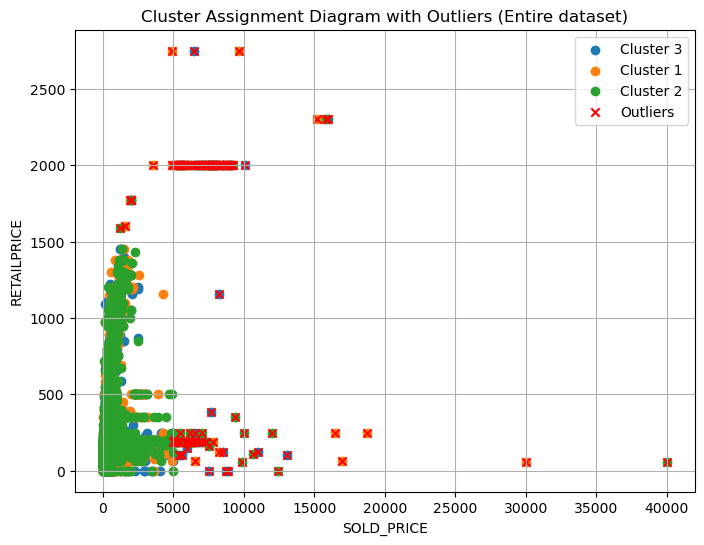

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import mahalanobis

# Select numerical columns for MD calculation
numerical_cols = ['SOLD_PRICE', 'RETAILPRICE', 'SIZE_VALUE']

# Condition to choose between subset and entire dataset
use_subset = False  # Set to True to use a subset, False to use entire dataset

if use_subset:
    # Accessing only the first 1000 rows of the DataFrame
    df_subset = df.head(1000)
else:
    df_subset = df  # Use entire dataset

# Calculate mean and covariance matrix
mean = np.mean(df_subset[numerical_cols], axis=0)
covariance_matrix = np.cov(df_subset[numerical_cols], rowvar=False)

# Calculate Mahalanobis Distance for each data point
md = []
for idx, row in df_subset[numerical_cols].iterrows():
    md.append(mahalanobis(row, mean, np.linalg.inv(covariance_matrix)))

# Set specific thresholds for outliers
threshold_x = 5000  # Define your threshold for SOLD_PRICE
threshold_y = 1500  # Define your threshold for RETAILPRICE

# Identify outliers based on the defined thresholds
outliers = df_subset[(df_subset['SOLD_PRICE'] > threshold_x) | (df_subset['RETAILPRICE'] > threshold_y)]

# Assign random clusters initially
df_subset['Cluster'] = np.random.randint(1, 4, size=len(df_subset))

# Visualization
plt.figure(figsize=(8, 6))

for cluster_num in df_subset['Cluster'].unique():
    cluster_data = df_subset[df_subset['Cluster'] == cluster_num]
    plt.scatter(cluster_data['SOLD_PRICE'], cluster_data['RETAILPRICE'], label=f'Cluster {cluster_num}')

# Highlight outliers with 'X' markers in red
plt.scatter(outliers['SOLD_PRICE'], outliers['RETAILPRICE'], color='red', marker='x', label='Outliers')

plt.xlabel('SOLD_PRICE')
plt.ylabel('RETAILPRICE')

if use_subset:
    title = 'Cluster Assignment Diagram with Outliers'
else:
    title = 'Cluster Assignment Diagram with Outliers (Entire dataset)'

plt.title(title)
plt.legend()
plt.grid(True)
plt.show()


In [36]:
# Identify outliers based on the defined thresholds
outliers = df_subset[(df_subset['SOLD_PRICE'] > threshold_x) | (df_subset['RETAILPRICE'] > threshold_y)]

# Print the number of outliers
print(f"Number of outliers: {len(outliers)}")


Number of outliers: 129


In [37]:
# Calculate Profit for each outlier
outliers['Profit'] = outliers['SOLD_PRICE'] - outliers['RETAILPRICE']

# Select top 10 most profitable outliers
top_10_profitable_outliers = outliers.nlargest(10, 'Profit')[['SKU', 'BRAND', 'Profit']]

# Print the top 10 most profitable outliers with SKU and BRAND columns
print("Top 10 Most Profitable Outliers:")
print(top_10_profitable_outliers)


Top 10 Most Profitable Outliers:
               SKU   BRAND  Profit
204542  308270-111    Nike   39940
185484  308270-111    Nike   29940
135389  508214-660    Nike   18513
104869        4285  Jordan   16867
226617  508214-660    Nike   16214
409368  417744-001    Nike   13700
122663  417744-001    Nike   13518
32598   CT2552-800    Nike   12932
460660  417744-001    Nike   12865
134515   836733-XC  Jordan   12420


C:\Users\brend\AppData\Local\Temp\ipykernel_25500\380678878.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers['Profit'] = outliers['SOLD_PRICE'] - outliers['RETAILPRICE']


 ---------- Literature Review ---------- 

Assignment 2 - AIGS 1003 - ML - Loyalist College. 

LeCheminant, R. (2020, August 31). K means without libraries - python. Medium. 
https://towardsdatascience.com/k-means-without-libraries-python-feb3572e2eef 

Rogel-Salazar, D. J. (2022, April 1). K-means clustering in Python: A step-by-step guide. Domino Data Lab. https://domino.ai/blog/getting-started-with-k-means-clustering-in-python 

HarisH-Reddy-DS. (2019). Kmeans Clustering. GitHub Gist. 
https://gist.github.com/HarisH-Reddy-DS/cd5b90b0bcd8db9fc71f97ee5adc7cc3 

CihanBosnali. (2019). K-Means Clustering Without ML Libraries. GitHub. 
https://github.com/CihanBosnali/Machine-Learning-without-Libraries/blob/master/K-Means-Clustering/K-Means-Clustering-without-ML-libraries.ipynb 

K-means clustering. scikit Learn. (n.d.). https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html# 


------------------------------------------
